In [69]:
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# 주요 라이브러리 import

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = "/Users/syshin/Desktop/Himedia/Himedia_Jupyter/NanumGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
import scipy.io as spio
%matplotlib inline


In [70]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


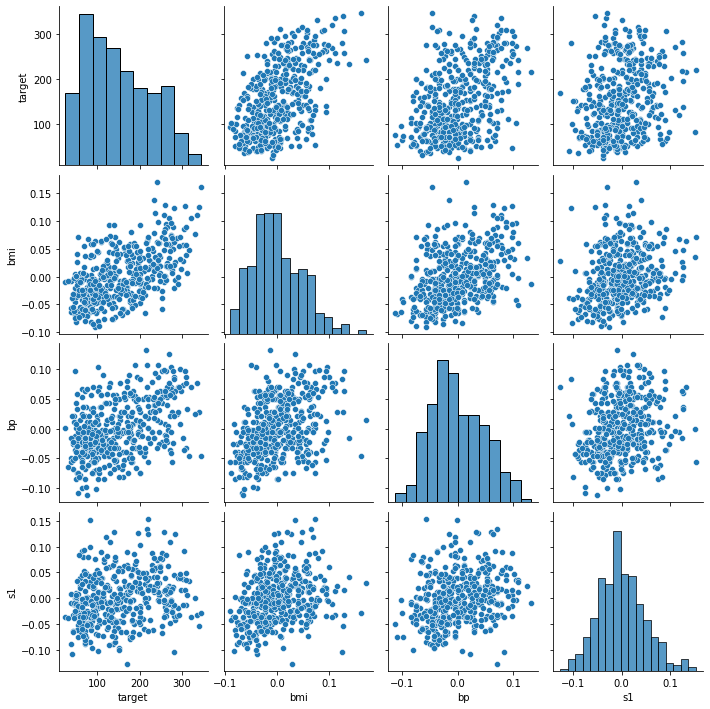

In [71]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

In [72]:
from sklearn.datasets import make_regression
from sklearn import datasets
import numpy as np

In [73]:
plt.rcParams['font.family'] = "Malgun Gothic"

In [74]:
dataset = datasets.fetch_california_housing()


In [75]:
def test_multi_target_regression_partial_fit():
    X, y = datasets.make_regression(n_targets=3)
    X_train, y_train = X[:50], y[:50]
    X_test, y_test = X[50:], y[50:]

    references = np.zeros_like(y_test)
    half_index = 25
    for n in range(3):
        sgr = SGDRegressor(random_state=0, max_iter=5)
        sgr.partial_fit(X_train[:half_index], y_train[:half_index, n])
        sgr.partial_fit(X_train[half_index:], y_train[half_index:, n])
        references[:, n] = sgr.predict(X_test)

    sgr = MultiOutputRegressor(SGDRegressor(random_state=0, max_iter=5))

    sgr.partial_fit(X_train[:half_index], y_train[:half_index])
    sgr.partial_fit(X_train[half_index:], y_train[half_index:])

    y_pred = sgr.predict(X_test)
    assert_almost_equal(references, y_pred)
    assert not hasattr(MultiOutputRegressor(Lasso), 'partial_fit') 

In [76]:
test_multi_target_regression_partial_fit

<function __main__.test_multi_target_regression_partial_fit()>

/Users/syshin/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/syshin/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


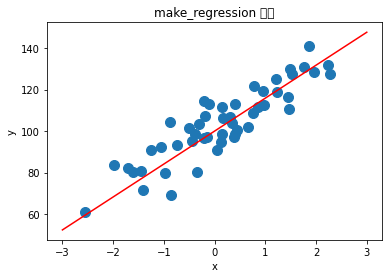

In [77]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제")
plt.show()

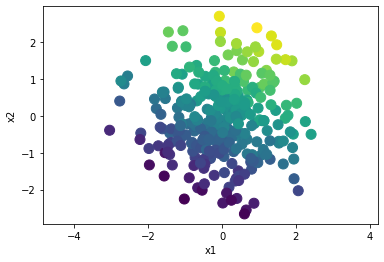

In [78]:
X, y, c = make_regression(n_samples=300, n_features=2, noise=10, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

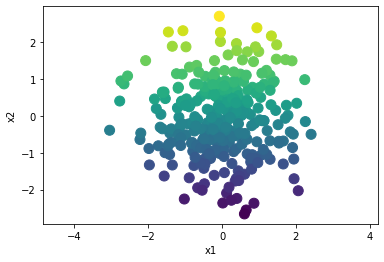

In [79]:
X, y, c = make_regression(n_samples=300, n_features=2, n_informative=1, noise=0, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

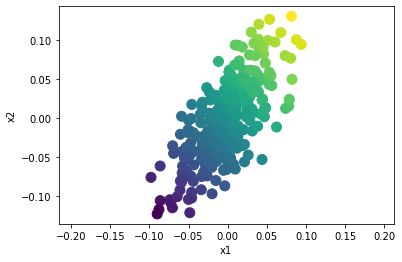

In [80]:
X, y, c = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0, tail_strength=0, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

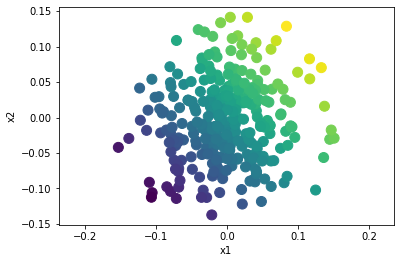

In [81]:
X, y, c = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0, tail_strength=1, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()